In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
stroke = pd.read_csv('/content/stroke_risk_dataset.csv')
stroke.head(10)

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1
5,1,1,0,0,0,1,1,0,0,0,0,1,1,1,0,34,43.0,0
6,0,1,1,1,1,0,1,0,0,0,0,1,0,1,1,74,68.0,1
7,0,0,1,0,0,0,0,1,1,1,1,1,0,1,1,47,54.5,1
8,1,1,0,0,0,0,1,1,0,1,0,0,0,0,1,20,31.0,0
9,0,1,1,0,1,1,0,0,0,0,0,1,1,0,0,79,60.5,1


In [ ]:
print('First 5 rows of the DataFrame:')
print(stroke.head())

print('\nDataFrame Info:')
stroke.info()

print('\nDescriptive Statistics:')
print(stroke.describe())

print('\nMissing Values:')
print(stroke.isnull().sum())

First 5 rows of the DataFrame:
   Chest Pain  Shortness of Breath  Irregular Heartbeat  Fatigue & Weakness  \
0           0                    1                    1                   1   
1           0                    0                    1                   0   
2           1                    0                    0                   1   
3           1                    0                    1                   1   
4           0                    0                    1                   0   

   Dizziness  Swelling (Edema)  Pain in Neck/Jaw/Shoulder/Back  \
0          0                 0                               0   
1          0                 1                               0   
2          1                 1                               0   
3          0                 1                               1   
4          0                 1                               0   

   Excessive Sweating  Persistent Cough  Nausea/Vomiting  High Blood Pressure  \
0               

## Analyze Stroke Risk Distribution


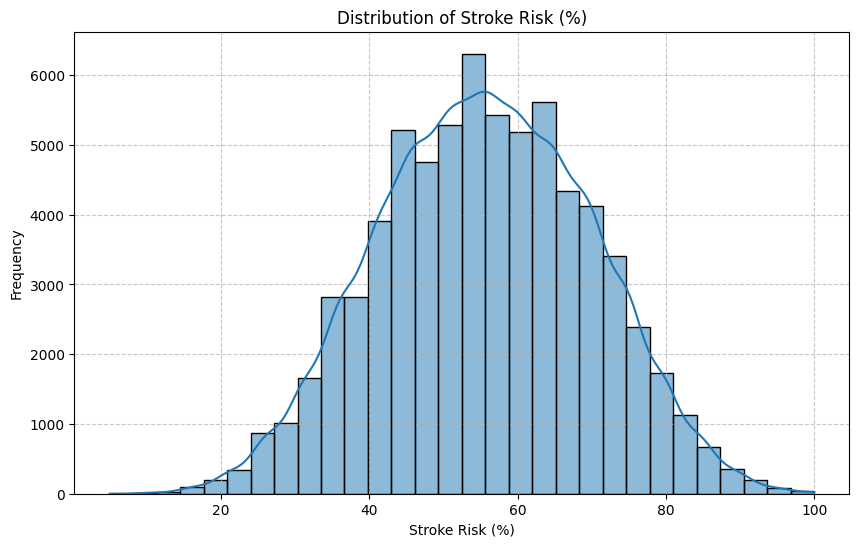

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(stroke['Stroke Risk (%)'], bins=30, kde=True)
plt.title('Distribution of Stroke Risk (%)')
plt.xlabel('Stroke Risk (%)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Feature Engineering


In [ ]:
symptom_columns = [col for col in stroke.columns if col not in ['Age', 'Stroke Risk (%)', 'At Risk (Binary)']]
stroke['Total Symptoms'] = stroke[symptom_columns].sum(axis=1)
print('DataFrame with new "Total Symptoms" column:')
print(stroke.head())

DataFrame with new "Total Symptoms" column:
   Chest Pain  Shortness of Breath  Irregular Heartbeat  Fatigue & Weakness  \
0           0                    1                    1                   1   
1           0                    0                    1                   0   
2           1                    0                    0                   1   
3           1                    0                    1                   1   
4           0                    0                    1                   0   

   Dizziness  Swelling (Edema)  Pain in Neck/Jaw/Shoulder/Back  \
0          0                 0                               0   
1          0                 1                               0   
2          1                 1                               0   
3          0                 1                               1   
4          0                 1                               0   

   Excessive Sweating  Persistent Cough  Nausea/Vomiting  High Blood Pressure  \
0  

## Correlation Analysis


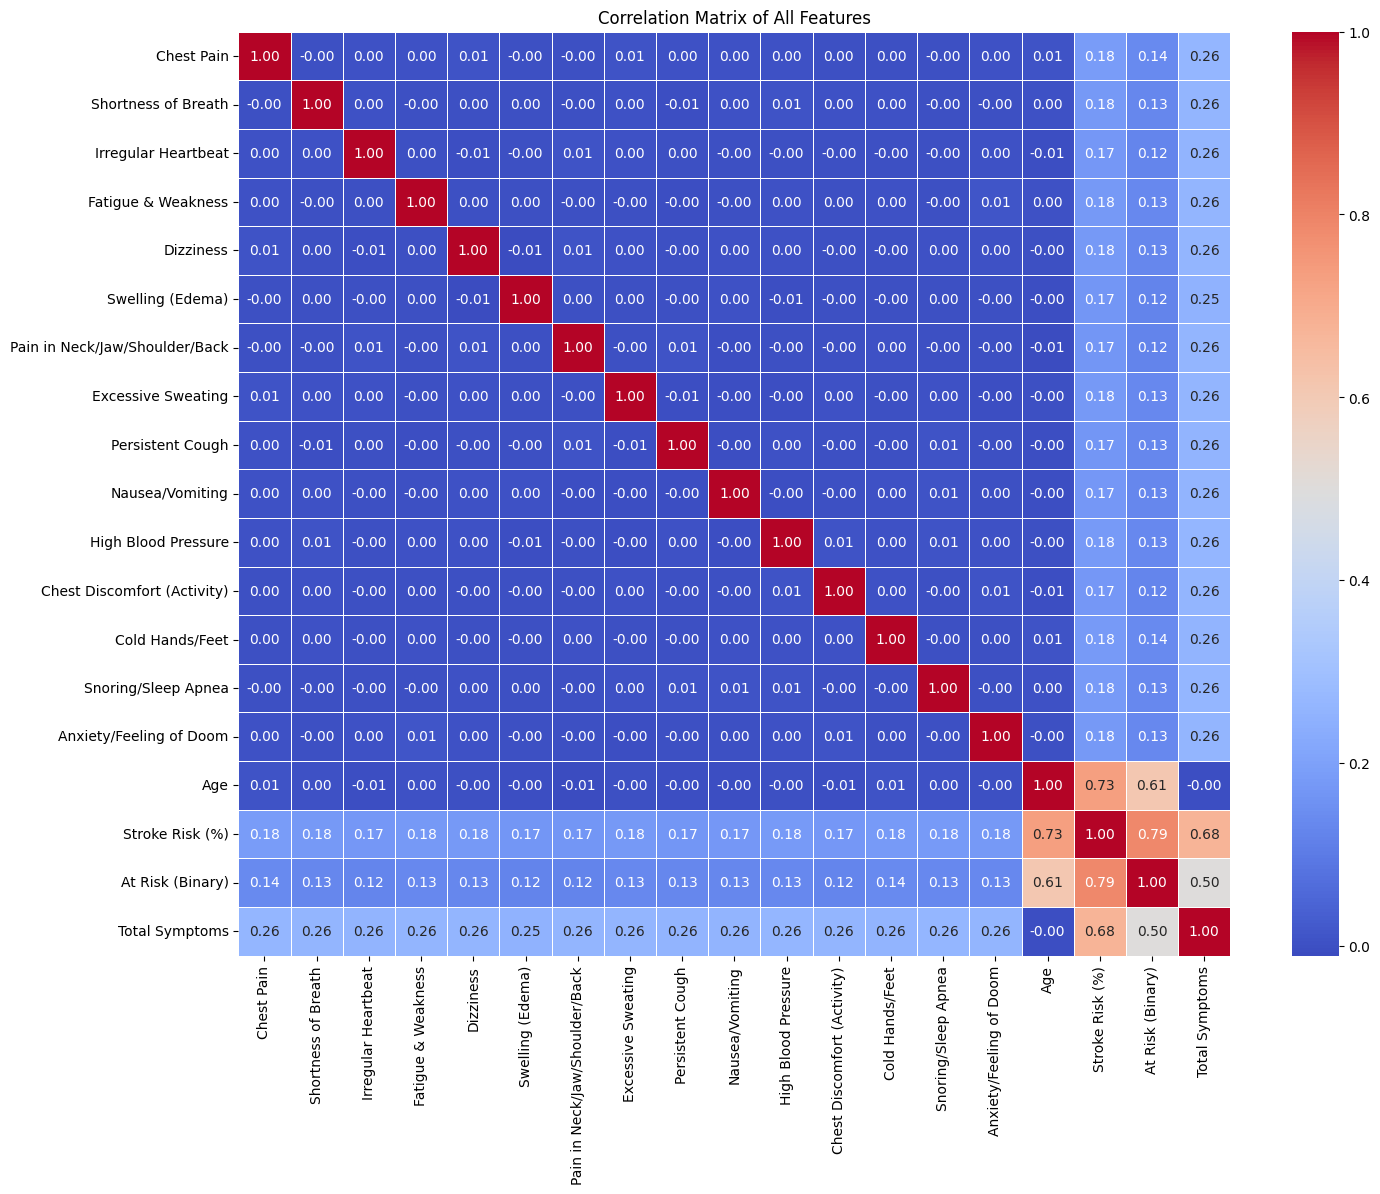

In [ ]:
correlation_matrix = stroke.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of All Features')
plt.show()

Correlations with Stroke Risk (%):
Stroke Risk (%)                   1.000000
At Risk (Binary)                  0.790743
Age                               0.733862
Total Symptoms                    0.676228
Chest Pain                        0.183767
Cold Hands/Feet                   0.180359
Snoring/Sleep Apnea               0.180017
High Blood Pressure               0.179352
Shortness of Breath               0.178170
Fatigue & Weakness                0.177101
Anxiety/Feeling of Doom           0.176381
Excessive Sweating                0.175280
Dizziness                         0.175080
Nausea/Vomiting                   0.172524
Chest Discomfort (Activity)       0.171797
Irregular Heartbeat               0.171128
Persistent Cough                  0.170379
Swelling (Edema)                  0.168979
Pain in Neck/Jaw/Shoulder/Back    0.167602
Name: Stroke Risk (%), dtype: float64


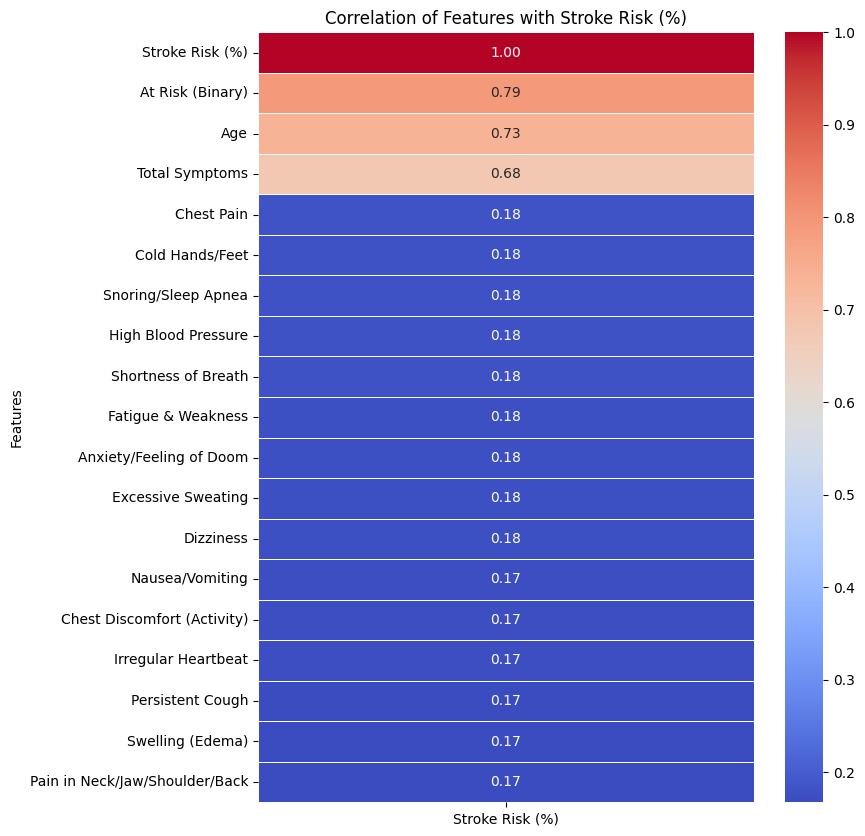

In [ ]:
stroke_risk_correlations = correlation_matrix['Stroke Risk (%)'].sort_values(ascending=False)

print('Correlations with Stroke Risk (%):')
print(stroke_risk_correlations)

plt.figure(figsize=(8, 10))
sns.heatmap(stroke_risk_correlations.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, cbar=True)
plt.title('Correlation of Features with Stroke Risk (%)')
plt.ylabel('Features')
plt.show()

## Visualize Key Feature Relationships

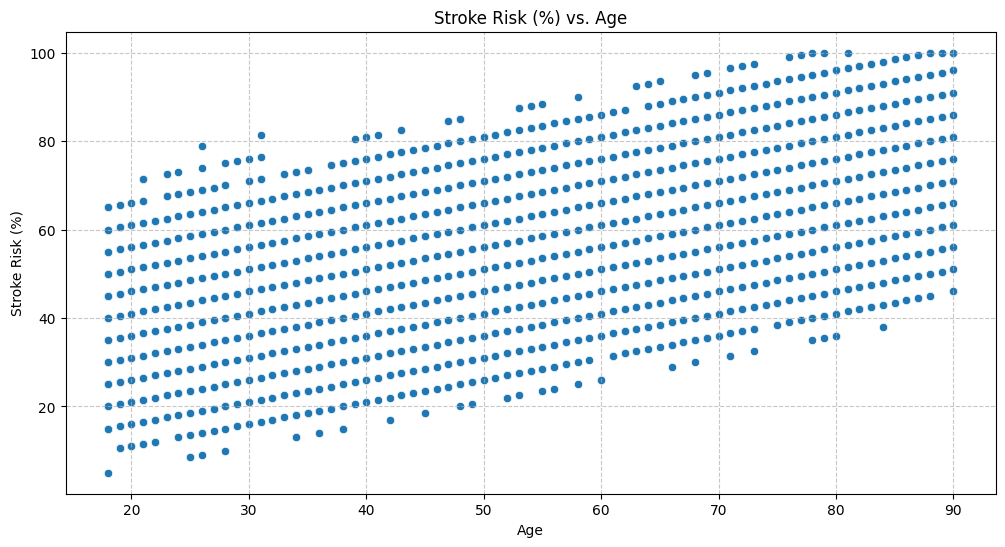

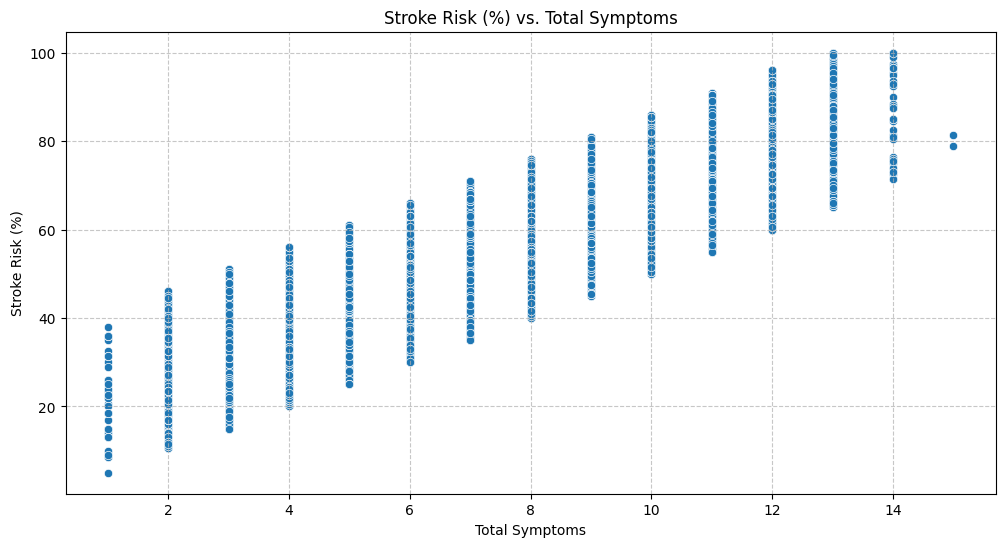

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=stroke, x='Age', y='Stroke Risk (%)')
plt.title('Stroke Risk (%) vs. Age')
plt.xlabel('Age')
plt.ylabel('Stroke Risk (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=stroke, x='Total Symptoms', y='Stroke Risk (%)')
plt.title('Stroke Risk (%) vs. Total Symptoms')
plt.xlabel('Total Symptoms')
plt.ylabel('Stroke Risk (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Conclusion:
*   The 'Stroke Risk (%)' column ranges from 5.0% to 100.0%, with an average risk percentage of approximately 55.56%.
*   The dataset contains no missing values across any of its columns.
*   The distribution of 'Stroke Risk (%)' was visualized using a histogram, showing its spread and frequency.
*   A new feature, 'Total Symptoms', was engineered by summing up binary symptom columns, representing the cumulative number of symptoms for each patient.
*   **Strongest positive correlations with 'Stroke Risk (%)' were found with:**
    *   'At Risk (Binary)': 0.79
    *   'Age': 0.73
    *   'Total Symptoms': 0.68
*   Moderate positive correlations with 'Stroke Risk (%)' were observed for individual symptoms such as 'Chest Pain', 'Cold Hands/Feet', 'Snoring/Sleep Apnea', and 'High Blood Pressure', generally ranging from 0.17 to 0.18.
*   Visualizations (scatter plots) confirmed a positive relationship between 'Stroke Risk (%)' and both 'Age', and 'Total Symptoms', indicating that stroke risk tends to increase with age and the number of reported symptoms.
